In [68]:

import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import pickle

import pandas as pd

from IPython.display import Image

from google.auth.transport.requests import Request

def display_image(id):
    img = google_photos.mediaItems().get(mediaItemId=id).execute()
    return Image(img['baseUrl'], format='jpg')
def main():
	# If modifying these scopes, delete the file token.pickle.
	SCOPES = ['https://www.googleapis.com/auth/photoslibrary.readonly']

	creds = None
	# The file token.pickle stores the user's access and refresh tokens, and is
	# created automatically when the authorization flow completes for the first
	# time.
	if os.path.exists('token.pickle'):
		with open('token.pickle', 'rb') as token:
			creds = pickle.load(token)
	# If there are no (valid) credentials available, let the user log in.
	if not creds or not creds.valid:
		if creds and creds.expired and creds.refresh_token:
			creds.refresh(Request())
		else:
			flow = InstalledAppFlow.from_client_secrets_file(
				'credentials.json', SCOPES)
			creds = flow.run_local_server(port=0)
		# Save the credentials for the next run
		with open('token.pickle', 'wb') as token:
			pickle.dump(creds, token)

	google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)



	items = []
	nextpagetoken = None
	# The default number of media items to return at a time is 25. The maximum pageSize is 100.
	while nextpagetoken != '':
		print(f"Number of items processed:{len(items)}", end='\r')
		results = google_photos.mediaItems().list(pageSize=100, pageToken=nextpagetoken).execute()
		items += results.get('mediaItems', [])
		nextpagetoken = results.get('nextPageToken', '')


	df = pd.DataFrame(items)

	# Taking the column mediaMetadata and splitting it into individual columns
	dfmeta = df.mediaMetadata.apply(pd.Series)

	# Combining all the different columns into one final dataframe
	photos = pd.concat(
		[
			df.drop('mediaMetadata', axis=1), 
			dfmeta.drop('photo', axis=1), 
			dfmeta.photo.apply(pd.Series)
		], axis=1
	)


	photos.creationTime = pd.to_datetime(photos.creationTime)

	# Convert other numeric data into numeric dtypes
	for c in ['width', 'height', 'apertureFNumber', 'focalLength', 'isoEquivalent']:
		photos[c] = pd.to_numeric(photos[c])
	
	photos.to_hdf('google_photo_data.hdf', key='photos')


	with open('token.pickle', 'rb') as token:
		creds = pickle.load(token)
	google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)





	photos = pd.read_hdf('google_photo_data.hdf')
	display_image(photos.iloc[8560].id)

if __name__ == '__main__':
    main()

value: 7370


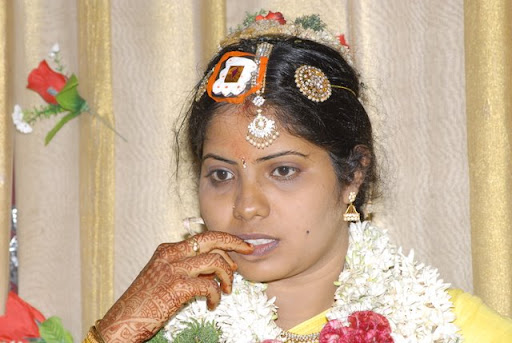

In [65]:
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
import pickle

# generate random integer values
from numpy.random import seed
from numpy.random import randint
import secrets
# seed random number generator
seed(1)
# generate some integers
valueInt = secrets.randbelow(8560)

import pandas as pd

from IPython.display import Image, display

from google.auth.transport.requests import Request


with open('token.pickle', 'rb') as token:
    creds = pickle.load(token)
google_photos = build('photoslibrary', 'v1', credentials=creds, static_discovery=False)

print (f"value: {valueInt}")
photos = pd.read_hdf('google_photo_data.hdf')
#display_image(photos.iloc[1000].id)
img = google_photos.mediaItems().get(mediaItemId=photos.iloc[valueInt].id).execute()
img = Image(img['baseUrl'], format='jpg')
display(img)
